In [ ]:
!nvidia-smi

Tue Sep 28 06:39:10 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.63.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8    31W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!wget https://www.dropbox.com/s/fxn3ldztzwxm0rw/FruitsData.zip

--2021-09-28 06:39:16--  https://www.dropbox.com/s/fxn3ldztzwxm0rw/FruitsData.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.67.18, 2620:100:6020:18::a27d:4012
Connecting to www.dropbox.com (www.dropbox.com)|162.125.67.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/fxn3ldztzwxm0rw/FruitsData.zip [following]
--2021-09-28 06:39:16--  https://www.dropbox.com/s/raw/fxn3ldztzwxm0rw/FruitsData.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf5833158a68a8ba9c2f84a463f.dl.dropboxusercontent.com/cd/0/inline/BXCUGvbRI7iGjeGba0kb4-9uXgg40vSASfqVunsRvpoA9sQ2Hzq7xDBhooJPkev_4t2q51h-F7UeEteVJAfmquKuXeVzADaBEM0h89g7CHGY3Te_MTAgCq8-x5zMq-Ghlz95XTbnfKACh0mGMXRLH6XV/file# [following]
--2021-09-28 06:39:16--  https://ucf5833158a68a8ba9c2f84a463f.dl.dropboxusercontent.com/cd/0/inline/BXCUGvbRI7iGjeGba0kb4-9uXgg40vSASfqVunsRvpoA9sQ2Hzq7xDBhooJPkev_4t2q51h-F7UeEteVJ

In [ ]:
!unzip -q "/content/FruitsData.zip"

In [ ]:
# Imports required for this project
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

tf.random.set_seed(4)

In [ ]:
# Creating the Pathlib PATH objects
train_path = Path("fruits-360/Training")
test_path = Path("fruits-360/Test")

In [ ]:
# Getting Image paths 
train_image_paths = list(train_path.glob("*/*"))
train_image_paths = list(map(lambda x : str(x) , train_image_paths))

train_image_paths[:10]

['fruits-360/Training/Nectarine/r_319_100.jpg',
 'fruits-360/Training/Nectarine/200_100.jpg',
 'fruits-360/Training/Nectarine/300_100.jpg',
 'fruits-360/Training/Nectarine/r_248_100.jpg',
 'fruits-360/Training/Nectarine/r_105_100.jpg',
 'fruits-360/Training/Nectarine/164_100.jpg',
 'fruits-360/Training/Nectarine/178_100.jpg',
 'fruits-360/Training/Nectarine/215_100.jpg',
 'fruits-360/Training/Nectarine/230_100.jpg',
 'fruits-360/Training/Nectarine/r_273_100.jpg']

In [ ]:
# Getting their respective labels 

def get_label(image_path):
    return image_path.split("/")[-2]

train_image_labels = list(map(lambda x : get_label(x) , train_image_paths))
train_image_labels[:10]

['Nectarine',
 'Nectarine',
 'Nectarine',
 'Nectarine',
 'Nectarine',
 'Nectarine',
 'Nectarine',
 'Nectarine',
 'Nectarine',
 'Nectarine']

In [ ]:
from sklearn.preprocessing import LabelEncoder 

Le = LabelEncoder()
train_image_labels = Le.fit_transform(train_image_labels)

train_image_labels[:10]

array([70, 70, 70, 70, 70, 70, 70, 70, 70, 70])

In [ ]:
train_image_labels = tf.keras.utils.to_categorical(train_image_labels)

train_image_labels[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
from sklearn.model_selection import train_test_split 

Train_paths , Val_paths , Train_labels , Val_labels = train_test_split(train_image_paths , train_image_labels)

In [ ]:
Train_paths[:10] , Train_labels[:10]

(['fruits-360/Training/Apple Red Yellow 2/r2_73_100.jpg',
  'fruits-360/Training/Onion Red/r_110_100.jpg',
  'fruits-360/Training/Cactus fruit/r_67_100.jpg',
  'fruits-360/Training/Tomato 4/r_51_100.jpg',
  'fruits-360/Training/Peach 2/r2_38_100.jpg',
  'fruits-360/Training/Eggplant/r_142_100.jpg',
  'fruits-360/Training/Apple Red 3/184_100.jpg',
  'fruits-360/Training/Kaki/r_316_100.jpg',
  'fruits-360/Training/Tomato 4/r_274_100.jpg',
  'fruits-360/Training/Raspberry/r_57_100.jpg'],
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32))

In [ ]:
# Function used for Transformation

def load(image , label):
    image = tf.io.read_file(image)
    image = tf.io.decode_jpeg(image , channels = 3)
    return image , label

In [ ]:
# Define IMAGE SIZE and BATCH SIZE 
IMG_SIZE = 224 
BATCH_SIZE = 32

# Basic Transformation
resize = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.Resizing(IMG_SIZE, IMG_SIZE)          
])

# Data Augmentation
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
    tf.keras.layers.experimental.preprocessing.RandomZoom(height_factor = (-0.3, -0.2))
])

In [ ]:
# Function used to Create a Tensorflow Data Object
AUTOTUNE = tf.data.experimental.AUTOTUNE
def get_dataset(paths , labels , train = True):
    image_paths = tf.convert_to_tensor(paths)
    labels = tf.convert_to_tensor(labels)

    image_dataset = tf.data.Dataset.from_tensor_slices(image_paths)
    label_dataset = tf.data.Dataset.from_tensor_slices(labels)

    dataset = tf.data.Dataset.zip((image_dataset , label_dataset))

    dataset = dataset.map(lambda image , label : load(image , label))
    dataset = dataset.map(lambda image, label: (resize(image), label) , num_parallel_calls=AUTOTUNE)
    dataset = dataset.shuffle(1000)
    dataset = dataset.batch(BATCH_SIZE)

    if train:
        dataset = dataset.map(lambda image, label: (data_augmentation(image), label) , num_parallel_calls=AUTOTUNE)
    
    dataset = dataset.repeat()
    return dataset

In [ ]:
# Creating Train Dataset object and Verifying it
%time train_dataset = get_dataset(Train_paths , Train_labels)

image , label = next(iter(train_dataset))
print(image.shape)
print(label.shape)

CPU times: user 523 ms, sys: 15.6 ms, total: 539 ms
Wall time: 604 ms
(32, 224, 224, 3)
(32, 131)


Pepper Green


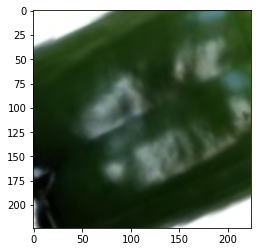

In [ ]:
# View a sample Training Image
print(Le.inverse_transform(np.argmax(label , axis = 1))[0])
plt.imshow((image[0].numpy()/255).reshape(224 , 224 , 3))

In [ ]:
%time val_dataset = get_dataset(Val_paths , Val_labels , train = False)

image , label = next(iter(val_dataset))
print(image.shape)
print(label.shape)

CPU times: user 50.2 ms, sys: 7.15 ms, total: 57.4 ms
Wall time: 57.3 ms
(32, 224, 224, 3)
(32, 131)


Cherry 1


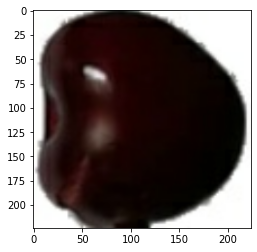

In [ ]:
# View a sample Validation Image
print(Le.inverse_transform(np.argmax(label , axis = 1))[0])
plt.imshow((image[0].numpy()/255).reshape(224 , 224 , 3))

In [ ]:
# Building efficientNetB3 model
from tensorflow.keras.applications import EfficientNetB3

backbone = EfficientNetB3(
    input_shape=(224, 224, 3),
    include_top=False
)

model = tf.keras.Sequential([
    backbone,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(131, activation='softmax')
])

model.summary()

43950080/43941136 [==============================] - 2s 0us/step
Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb3 (Functional)  (None, 7, 7, 1536)        10783535  
_________________________________________________________________
global_average_pooling2d (Gl (None, 1536)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1536)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               196736    
_________________________________________________________________
dense_1 (Dense)              (None, 131)               16899     
Total params: 10,997,170
Trainable params: 10,909,867
Non-trainable params: 87,303
_________________________________________________________________


In [ ]:
# Compiling your model by providing the Optimizer , Loss and Metrics
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
    loss = 'categorical_crossentropy',
    metrics=['accuracy' , tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.Recall(name='recall')]
)

In [ ]:
# Train the model
history = model.fit(
    train_dataset,
    steps_per_epoch=len(Train_paths)//BATCH_SIZE,
    epochs=2,
    #callbacks=[checkpoint , early_stop],
    validation_data=val_dataset,
    validation_steps = len(Val_paths)//BATCH_SIZE,
)

Epoch 1/2
 282/1586 [====>.........................] - ETA: 24:29 - loss: 1.3861 - accuracy: 0.6780 - precision: 0.8899 - recall: 0.5649

In [ ]:
model.layers[0].trainable = False

In [ ]:
# Defining our callbacks 
checkpoint = tf.keras.callbacks.ModelCheckpoint("best_weights.h5",verbose=1,save_best_only=True,save_weights_only = True)
early_stop = tf.keras.callbacks.EarlyStopping(patience=4)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb3 (Functional)  (None, 7, 7, 1536)        10783535  
_________________________________________________________________
global_average_pooling2d (Gl (None, 1536)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1536)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               196736    
_________________________________________________________________
dense_1 (Dense)              (None, 131)               16899     
Total params: 10,997,170
Trainable params: 213,635
Non-trainable params: 10,783,535
_________________________________________________________________


In [ ]:
# Train the model
history = model.fit(
    train_dataset,
    steps_per_epoch=len(Train_paths)//BATCH_SIZE,
    epochs= 4,
    callbacks=[checkpoint , early_stop],
    validation_data=val_dataset,
    validation_steps = len(Val_paths)//BATCH_SIZE,
)

Epoch 1/8
1586/1586 [==============================] - 1935s 1s/step - loss: 0.0891 - accuracy: 0.9734 - precision: 0.9771 - recall: 0.9704 - val_loss: 0.4727 - val_accuracy: 0.8761 - val_precision: 0.8982 - val_recall: 0.8601

Epoch 00001: val_loss improved from inf to 0.47266, saving model to best_weights.h5
Epoch 2/8
1586/1586 [==============================] - 1937s 1s/step - loss: 0.0666 - accuracy: 0.9808 - precision: 0.9831 - recall: 0.9786 - val_loss: 1.8138 - val_accuracy: 0.6429 - val_precision: 0.6729 - val_recall: 0.6204

Epoch 00002: val_loss did not improve from 0.47266
Epoch 3/8
1586/1586 [==============================] - 1941s 1s/step - loss: 0.0590 - accuracy: 0.9841 - precision: 0.9857 - recall: 0.9828 - val_loss: 0.4938 - val_accuracy: 0.8692 - val_precision: 0.8849 - val_recall: 0.8563

Epoch 00003: val_loss did not improve from 0.47266
Epoch 4/8
1586/1586 [==============================] - 1941s 1s/step - loss: 0.0469 - accuracy: 0.9871 - precision: 0.9882 - recal

Testing Phase

In [ ]:
from tensorflow.keras.applications import EfficientNetB3

backbone = EfficientNetB3(
    input_shape=(224, 224, 3),
    include_top=False
)

model = tf.keras.Sequential([
    backbone,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(131, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07),
    loss = 'categorical_crossentropy',
    metrics=['accuracy' , tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.Recall(name='recall')]
)

In [ ]:
model.load_weights("best_weights.h5")

In [ ]:
# Create a Dataset Object for 'Testing' Set just the way we did for Training and Validation
test_image_paths = list(test_path.glob("*/*"))
test_image_paths = list(map(lambda x : str(x) , test_image_paths))
test_labels = list(map(lambda x : get_label(x) , test_image_paths))

test_labels = Le.transform(test_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

test_image_paths = tf.convert_to_tensor(test_image_paths)
test_labels = tf.convert_to_tensor(test_labels)

def decode_image(image , label):
    image = tf.io.read_file(image)
    image = tf.io.decode_jpeg(image , channels = 3)
    image = tf.image.resize(image , [224 , 224] , method="bilinear")
    return image , label

test_dataset = (
     tf.data.Dataset
    .from_tensor_slices((test_image_paths, test_labels))
    .map(decode_image)
    .batch(BATCH_SIZE)
)

In [ ]:
# Verify Test Dataset Object
image , label = next(iter(test_dataset))
print(image.shape)
print(label.shape)

(32, 224, 224, 3)
(32, 131)


Peach Flat


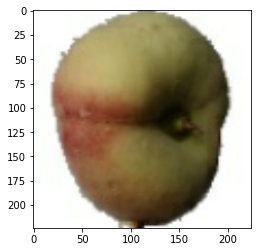

In [ ]:
# View a sample Validation Image
print(Le.inverse_transform(np.argmax(label , axis = 1))[0])
plt.imshow((image[0].numpy()/255).reshape(224 , 224 , 3))

In [ ]:
# Evaluating the loaded model
loss, acc, prec, rec = model.evaluate(test_dataset)

print(" Testing Acc : " , acc)
print(" Testing Precision " , prec)
print(" Testing Recall " , rec)

709/709 [==============================] - 180s 248ms/step - loss: 0.6758 - accuracy: 0.8259 - precision: 0.8572 - recall: 0.8054
 Testing Acc :  0.8259432315826416
 Testing Precision  0.8572366833686829
 Testing Recall  0.8053596615791321


Real time case

In [ ]:
def LoadImage(image_path):
    image = tf.io.read_file(image_path)
    image = tf.io.decode_jpeg(image , channels = 3)
    image = tf.image.resize(image , [224 , 224] , method="bilinear")
    plt.imshow(image.numpy()/255)
    image = tf.expand_dims(image , 0)
    return image

def RealtimePrediction(image_path , model, encoder_):
    image = LoadImage(image_path)
    prediction = model.predict(image)
    prediction = np.argmax(prediction , axis = 1)
    return encoder_.inverse_transform(prediction)[0]

'Nectarine'

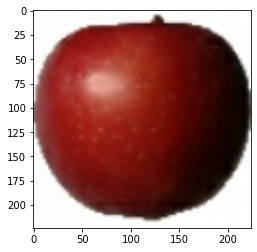

In [ ]:
RealtimePrediction("/content/fruits-360/Training/Apple Braeburn/100_100.jpg" , model , Le)